In [1]:
from argo_nn.Grabber import *
import numpy as np
import geopy
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
EG = EtopoGrabber()

In [4]:
just_one = pd.read_csv('just_one.csv')
just_one

,Unnamed: 0.1,index,Unnamed: 0,folderidx,float,profileidx,year,month,day,lat,...,prev3_ts7,prev3_ts8,prev3_dy,prev3_dx,ssh1,ssh2,bath1,bath2,pnlat,pnlon
0,0,0,112,2.0,2902573.0,125.0,2017.0,3.0,3.0,-27.995,...,-0.483323,0.657106,-0.229,-0.273,0.630030,-1.000000,1.000000,0.031732,-28.095459,-120.239305
1,1,1,113,2.0,2902573.0,126.0,2017.0,3.0,13.0,-28.145,...,-0.505345,0.637936,-0.136,-0.286,1.000000,-0.779453,1.000000,0.200338,-28.266022,-120.230976
2,2,2,114,2.0,2902573.0,127.0,2017.0,3.0,23.0,-28.267,...,-0.442858,0.514106,-0.128,-0.221,0.905253,-1.000000,1.000000,0.119882,-28.349315,-120.264433
3,3,3,115,2.0,2902573.0,128.0,2017.0,4.0,3.0,-28.250,...,-0.452919,0.496550,-0.150,-0.099,1.000000,0.031837,1.000000,0.073253,-28.212004,-120.492133
4,4,4,116,2.0,2902573.0,129.0,2017.0,4.0,13.0,-28.163,...,-0.636107,0.681706,-0.122,-0.052,-0.189491,-1.000000,1.000000,0.232778,-28.080292,-120.526155
5,5,5,117,2.0,2902573.0,130.0,2017.0,4.0,22.0,-27.990,...,-0.601384,0.508919,0.017,-0.128,-0.053026,-1.000000,-0.068842,1.000000,-27.851665,-120.859873
6,6,6,118,2.0,2902573.0,131.0,2017.0,5.0,2.0,-27.808,...,-0.737335,0.710894,0.087,-0.086,-0.471371,-1.000000,0.450265,1.000000,-27.666021,-121.241132
7,7,7,119,2.0,2902573.0,132.0,2017.0,5.0,12.0,-27.651,...,-0.644372,0.550055,0.173,-0.222,-0.104666,-1.000000,-0.340642,1.000000,-27.565818,-121.832176
8,8,8,120,2.0,2902573.0,133.0,2017.0,5.0,22.0,-27.609,...,-0.607703,0.579257,0.182,-0.318,-0.082962,-1.000000,1.000000,0.299927,-27.585259,-122.013603
9,9,9,121,2.0,2902573.0,134.0,2017.0,6.0,2.0,-27.623,...,-0.630542,0.705496,0.157,-0.451,0.088565,-1.000000,0.717516,1.000000,-27.625603,-122.271830


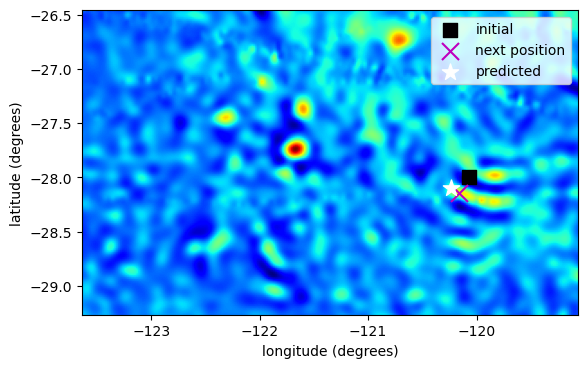

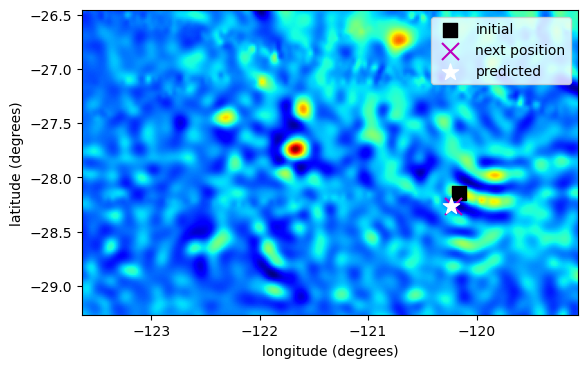

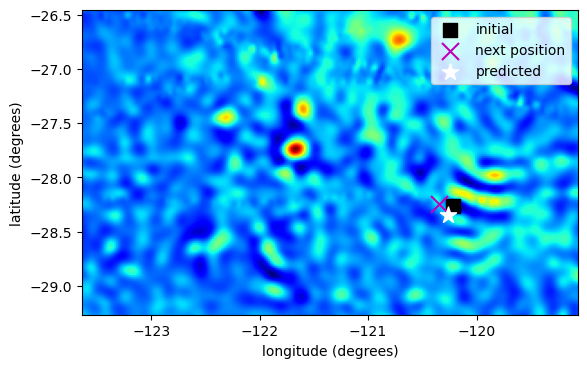

In [5]:
for i in range(just_one.shape[0]):
  y_plot = [just_one.get('lat')[i], just_one.get('nlat')[i], just_one.get('pnlat')[i]]
  x_plot = [just_one.get('lon')[i], just_one.get('nlon')[i], just_one.get('pnlon')[i]]

  minlon = just_one.get('lon').min()-1
  maxlon = just_one.get('lon').max()+1
  minlat = just_one.get('lat').min()-1
  maxlat = just_one.get('lat').max()+1
  rect = EG.get_rect(lat=(minlat + maxlat)/2, lon=(minlon + maxlon) /2, lat_radius=(minlat + maxlat)/2-minlat, lon_radius=(minlon + maxlon) /2-minlon)
  plt.imshow(rect.grid, cmap=plt.cm.jet, origin='lower', extent=(minlon, maxlon, minlat, maxlat))

  plt.scatter(x_plot[0], y_plot[0], marker='s', s=100, c='k')
  plt.scatter(x_plot[1], y_plot[1], marker='x', s=150, c='m')
  plt.scatter(x_plot[2], y_plot[2], marker='*', s=150, c='w')
  plt.legend(['initial', 'next position', 'predicted'])
  plt.xlim((minlon, maxlon))
  plt.ylim((minlat, maxlat))
  plt.xlabel('longitude (degrees)')
  plt.ylabel('latitude (degrees)')
  plt.show()